<a href="https://colab.research.google.com/github/thanhdaibl1572002/data-mining-project/blob/main/DATA_MINING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GIỚI THIỆU**
###**- Đề tài:** Dự đoán Tính Khả Dụng Tín Dụng Dựa trên Thông Tin Cá Nhân Khách Hàng.
###**- Phương pháp:** Random Forest.
###**- Nhãn dự đoán:** "Bad" hoặc "Good"
###**- Bộ dữ liệu:**: [Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)



#**IMPORT THƯ VIỆN**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#**TẢI BỘ DỮ LIỆU**

In [ ]:
! git clone 'https://github.com/thanhdaibl1572002/data-mining-project'

#**TỔNG QUAN DỮ LIỆU**

**- ID**: Mã số khách hàng

**- CODE_GENDER**: Giới tính

**- FLAG_OWN_CAR**: Có xe hơi không

**- FLAG_OWN_REALTY**: Có tài sản bất động sản không

**- CNT_CHILDREN**: Số lượng con cái

**- AMT_INCOME_TOTAL**: Thu nhập hàng năm

**- NAME_INCOME_TYPE**: Hạng mục thu nhập

**- NAME_EDUCATION_TYPE**: Cấp độ giáo dục

**- NAME_FAMILY_STATUS**: Tình trạng hôn nhân

**- NAME_HOUSING_TYPE**: Cách sống

**- DAYS_BIRTH**: Ngày sinh (Số ngày tính ngược từ ngày hiện tại, 0 là hôm nay, -1 là hôm qua)

**- DAYS_EMPLOYED**: Ngày bắt đầu làm việc (Số ngày tính ngược từ ngày hiện tại, 0 là ngày hiện tại, số dương là người đó hiện đang thất nghiệp)

**- FLAG_MOBIL**: Có điện thoại di động không

**- FLAG_WORK_PHONE**: Có điện thoại làm việc không

**- FLAG_PHONE**: Có điện thoại không

**- FLAG_EMAIL**: Có email không

**- OCCUPATION_TYPE**: Nghề nghiệp

**- CNT_FAM_MEMBERS**: Số lượng thành viên trong gia đình

**- ACCOUNT_AGE**: Tuổi của tài khoản

**- IS_HIGH_RISK**: Mức độ rủi ro (Nếu giá trị là 1, tài khoản được xem xét là có rủi ro cao. Nếu giá trị là 0, tài khoản không được xem xét là có rủi ro cao)

##**Đọc bộ dữ liệu**

In [25]:
df = pd.read_csv('./data-mining-project/data.csv')

##**Thông tin tổng quan**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

##**Thống kê tổng quan**

In [27]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,ACCOUNT_AGE,IS_HIGH_RISK
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


##**Xem 10 dòng dữ liệu đầu tiên**

In [28]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE,IS_HIGH_RISK
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13251,-3839,1,1,0,0,Accountants,2.0,-1.0,0
6,5022817,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-17262,-1617,1,0,0,0,Core staff,2.0,-16.0,0
7,5009811,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-21.0,0
8,5113922,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,-23478,365243,1,0,0,0,NaN,1.0,-50.0,0
9,5021541,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,-9310,-1678,1,0,0,0,NaN,3.0,-13.0,0


#**KHAI PHÁ DỮ LIỆU**

##**Kiểm tra dữ liệu thiếu**

In [29]:
missing_data = df.isnull().sum()
missing_data

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
ACCOUNT_AGE                0
IS_HIGH_RISK               0
dtype: int64

##**Điền giá trị thiếu cho cột OCCUPATION_TYPE**

In [30]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('UnKnown')
missing_data = df.isnull().sum()
missing_data

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
ACCOUNT_AGE            0
IS_HIGH_RISK           0
dtype: int64

##**Loại bỏ đặc trưng không cần thiết**

In [31]:
df.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  OCCUPATION_TYPE      36457 non-null  object 
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  ACCOUNT_AGE          36457 non-null  float64
 14  IS_HIGH_RISK         36457 non-null  int64  
dtypes: float64(3), int64(4), object(8)
m

##**Khai phá đặc trưng Numerical**

###**Xem các đặc trưng Numerical**

In [32]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'ACCOUNT_AGE', 'IS_HIGH_RISK'],
      dtype='object')

###**Biểu đồ tần suất xuất hiện**

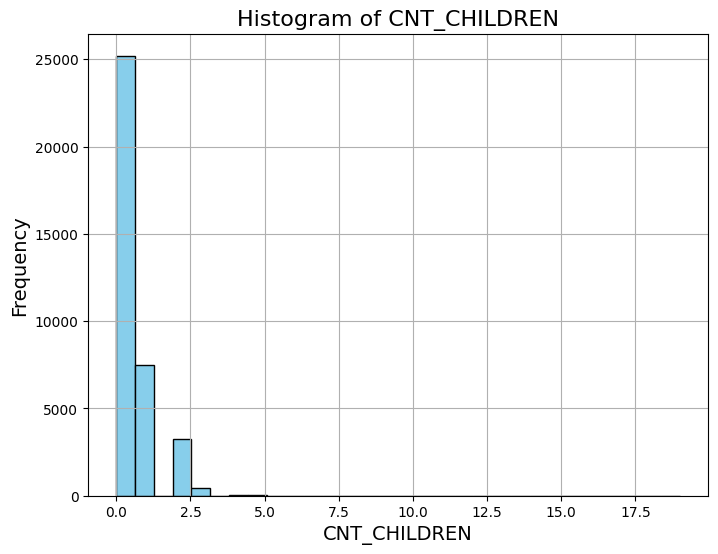

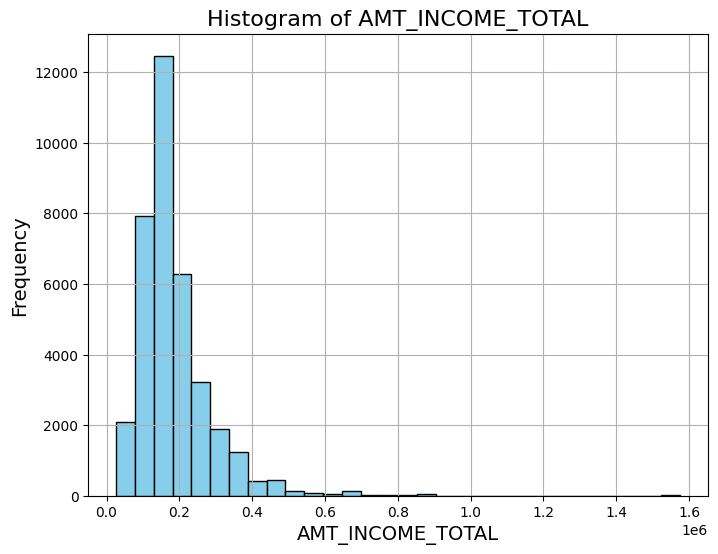

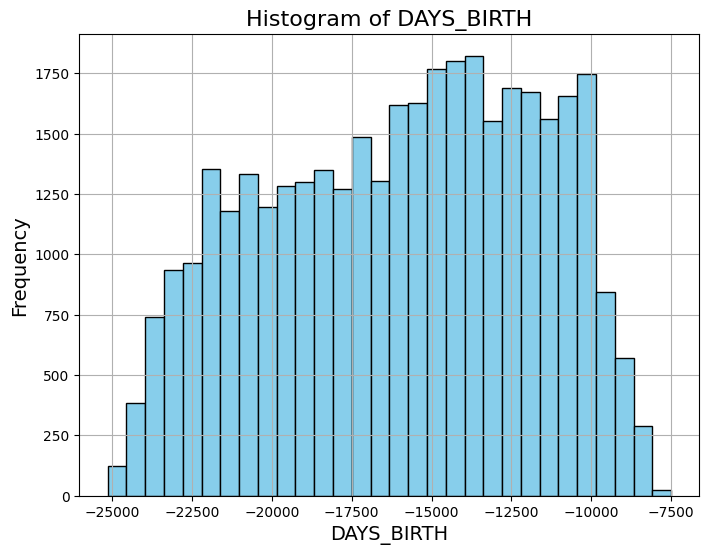

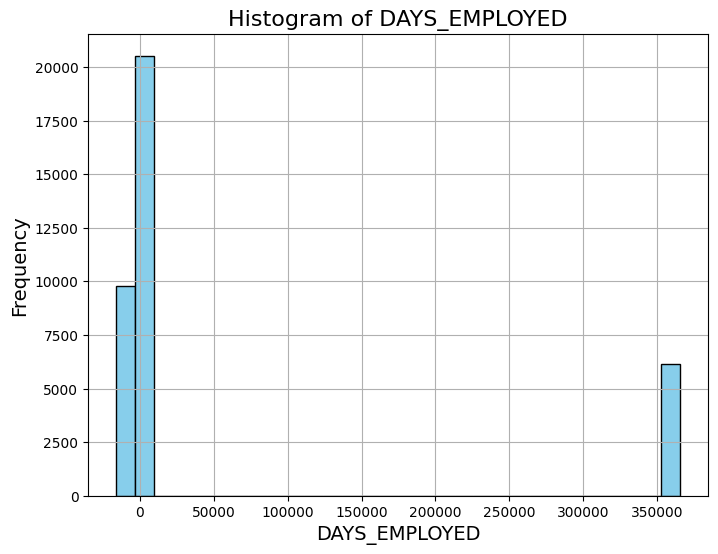

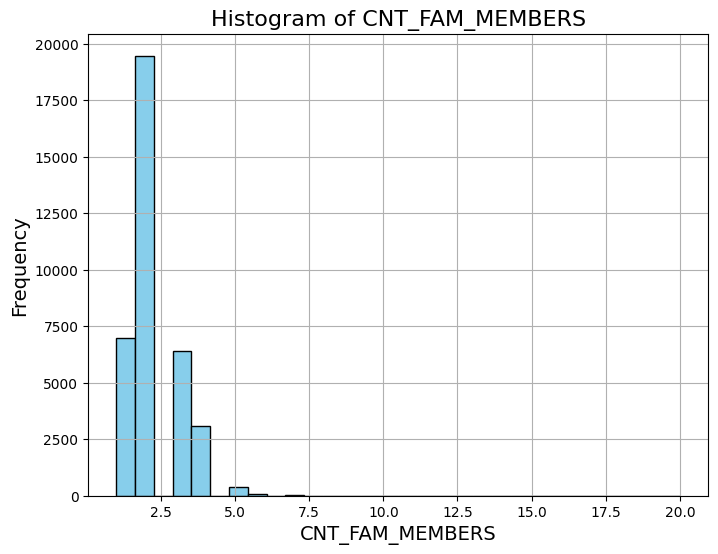

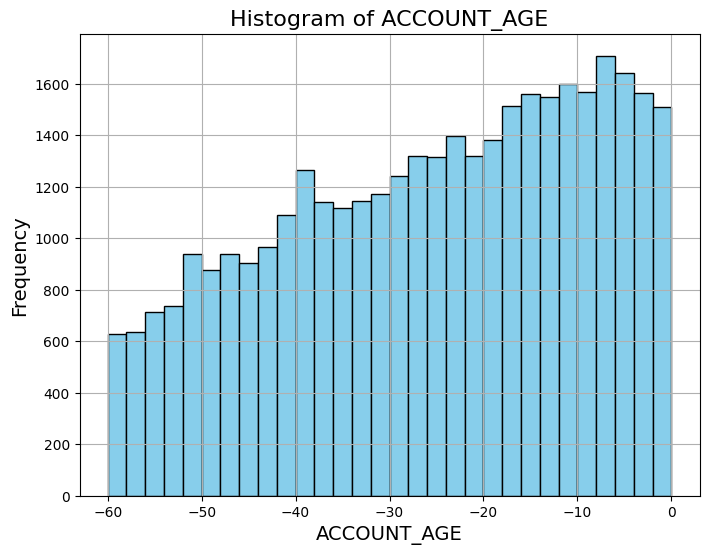

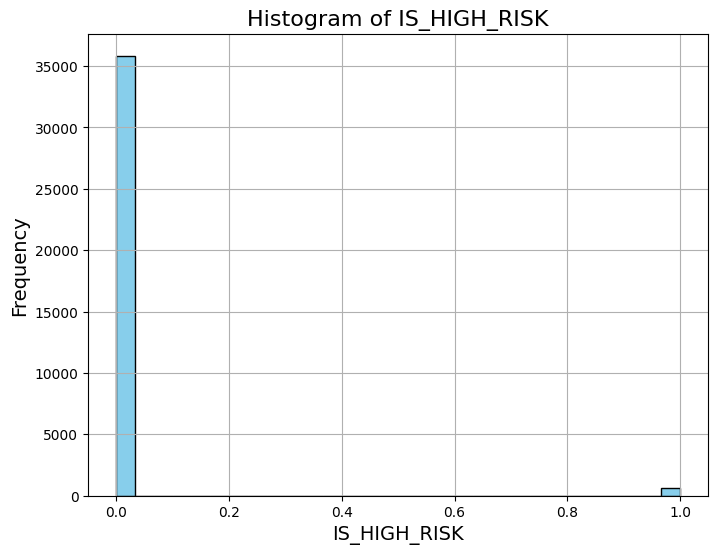

In [33]:
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'ACCOUNT_AGE', 'IS_HIGH_RISK']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {feature}', fontsize=16)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

###**Biểu đồ thể hiện ngoại lệ**

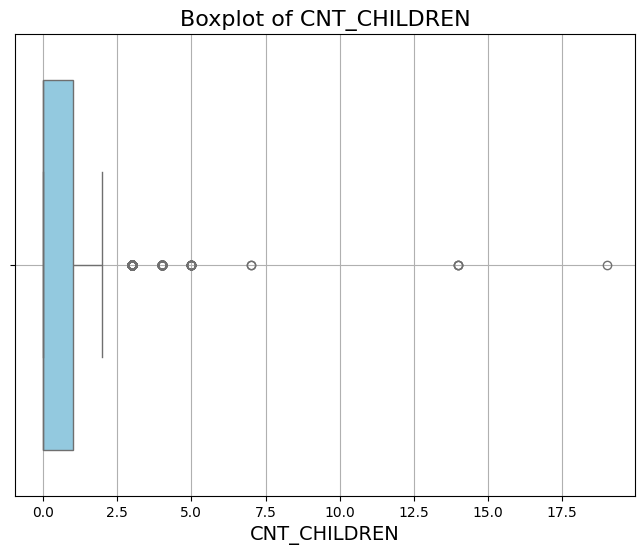

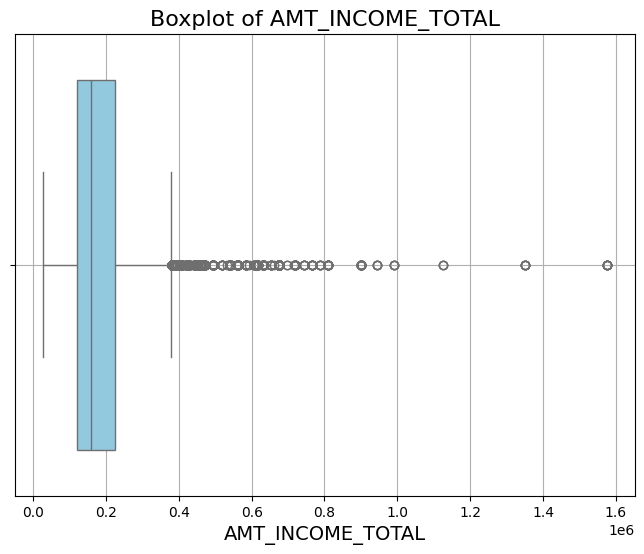

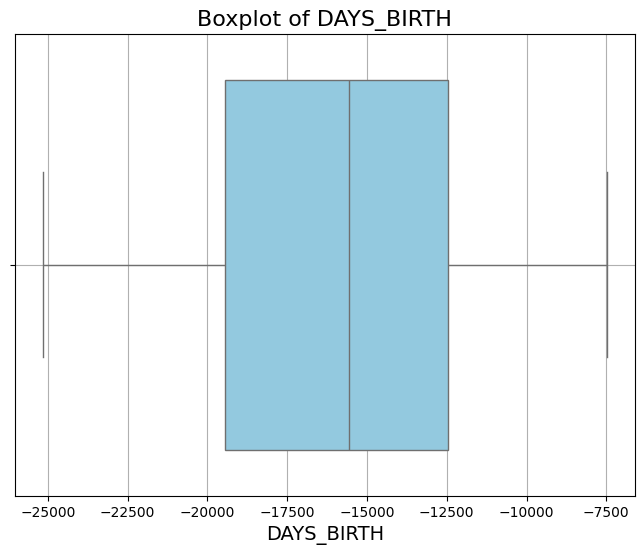

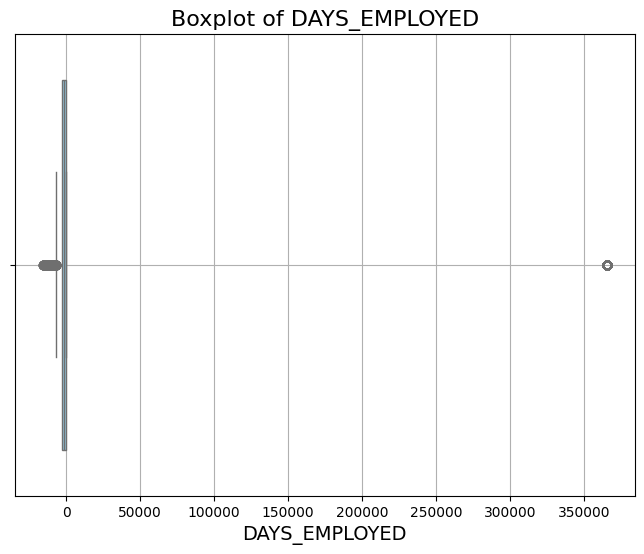

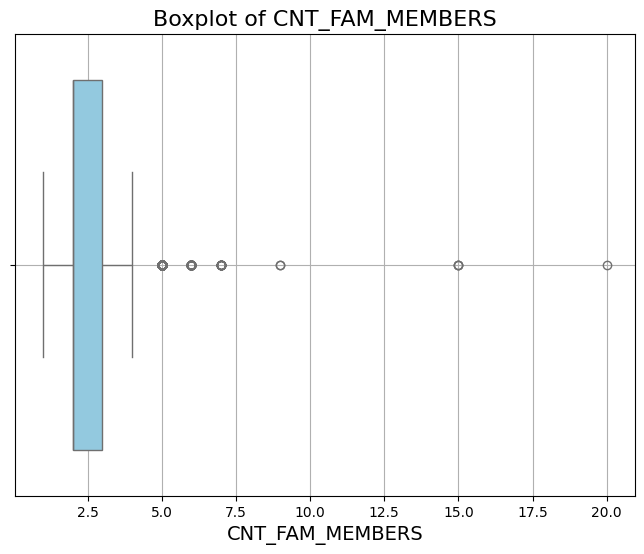

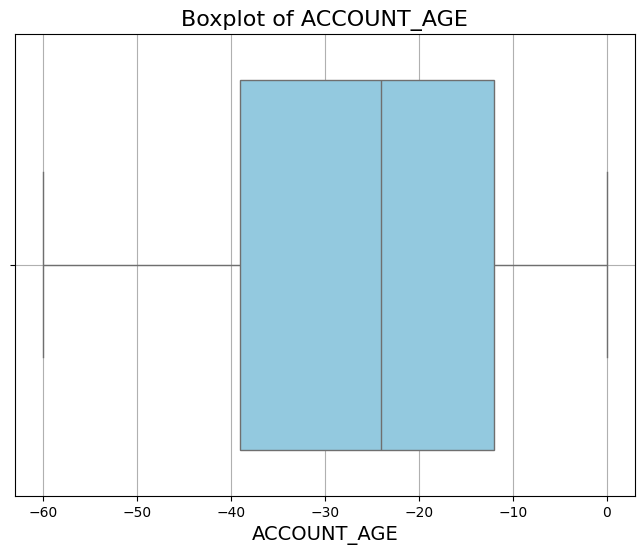

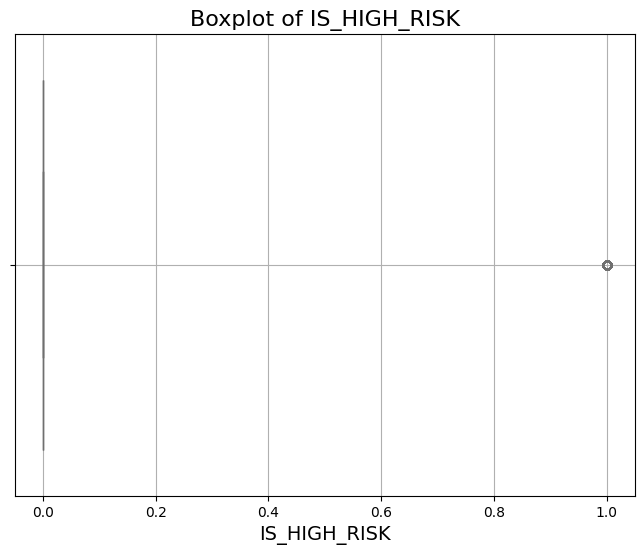

In [34]:
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'ACCOUNT_AGE', 'IS_HIGH_RISK']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.grid(True)
    plt.show()

##**Khai phá đặc trưng Categorical**

###**Xem các đặc trưng Categorial**

In [35]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

###**Bảng tần suất xuất hiện**

In [36]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for feature in categorical_features:
    print(df[feature].value_counts())
    print('\n')

F    24430
M    12027
Name: CODE_GENDER, dtype: int64


N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64


Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64


Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64


Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64


House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int6

###**Biểu đồ thể hiện phân bố**

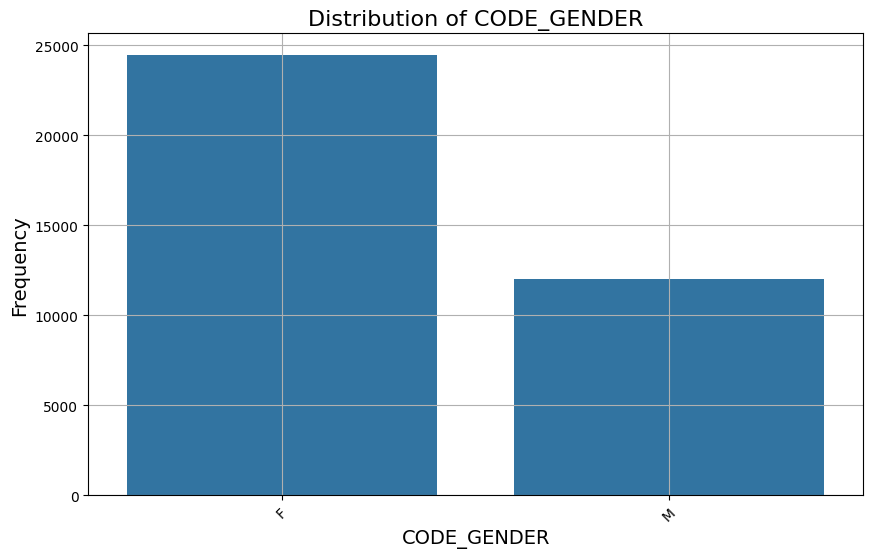

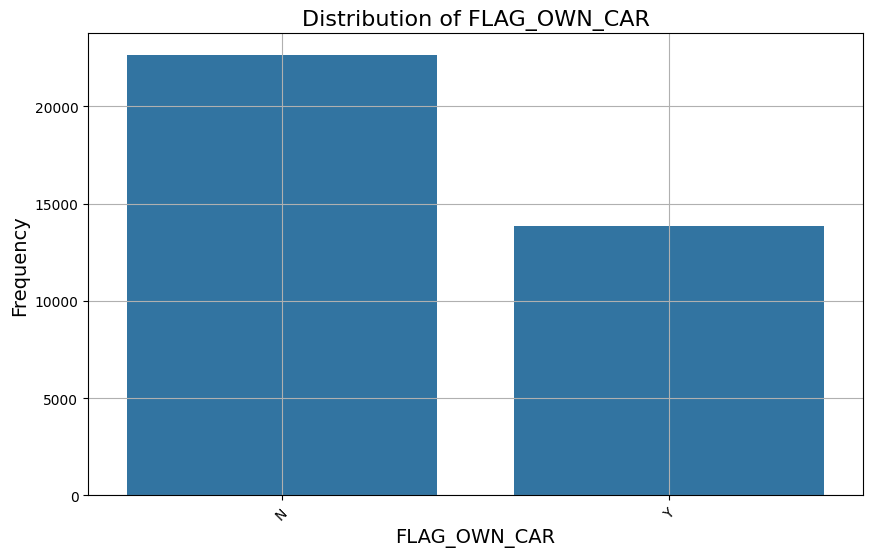

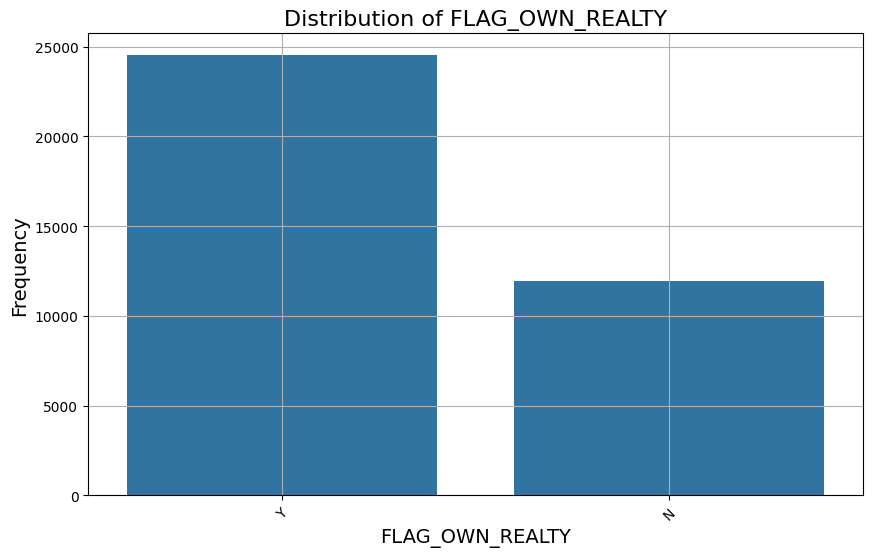

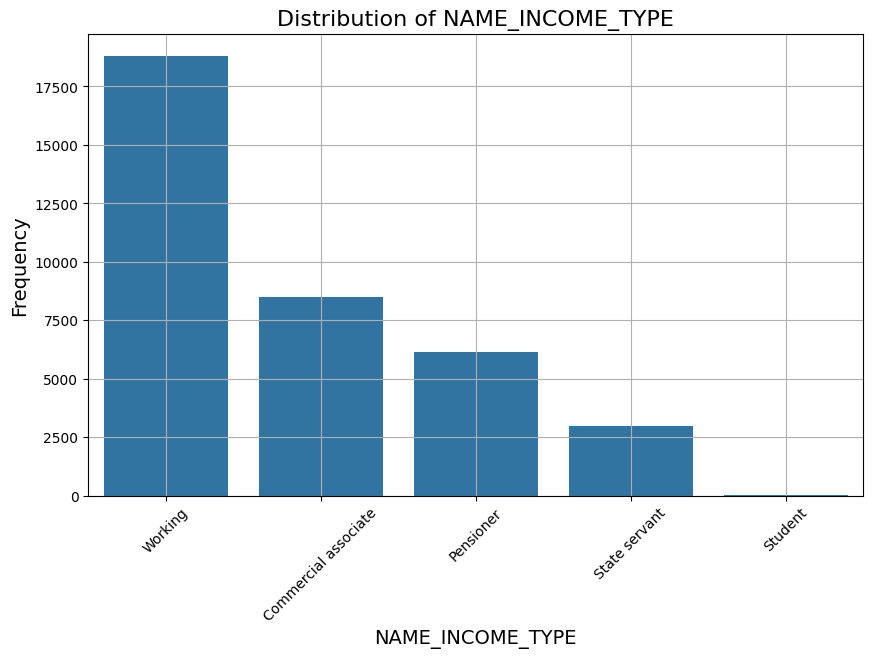

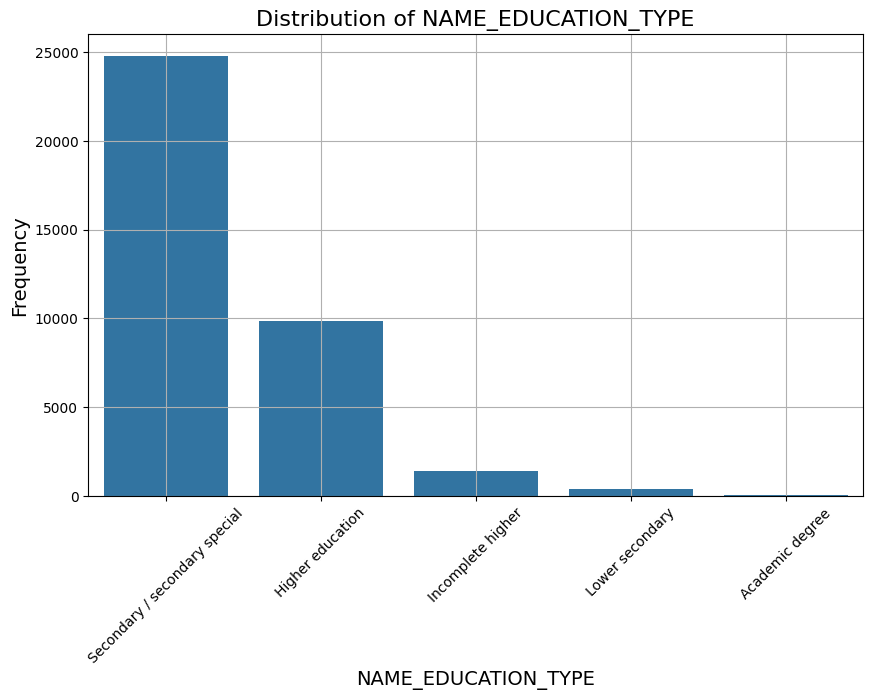

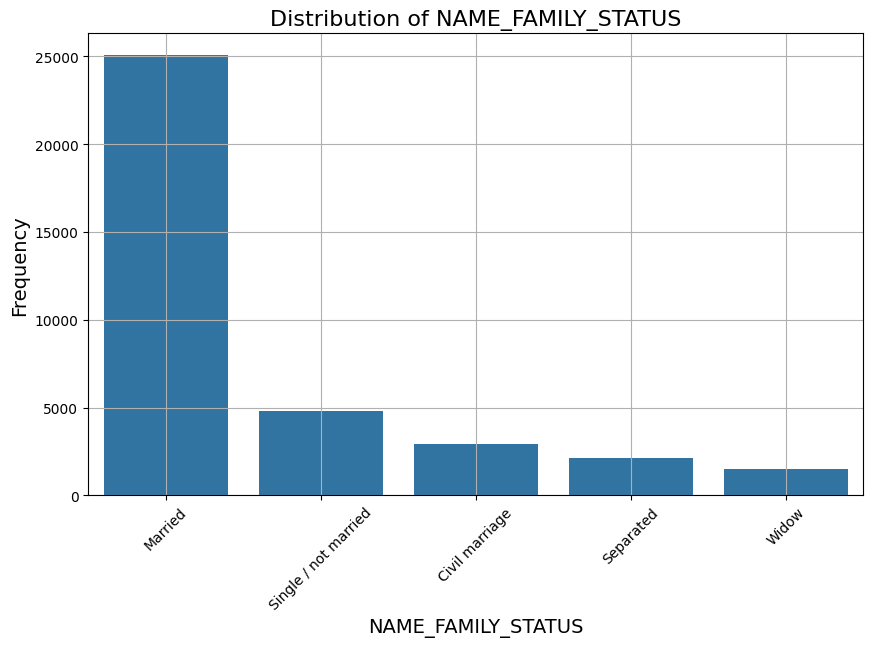

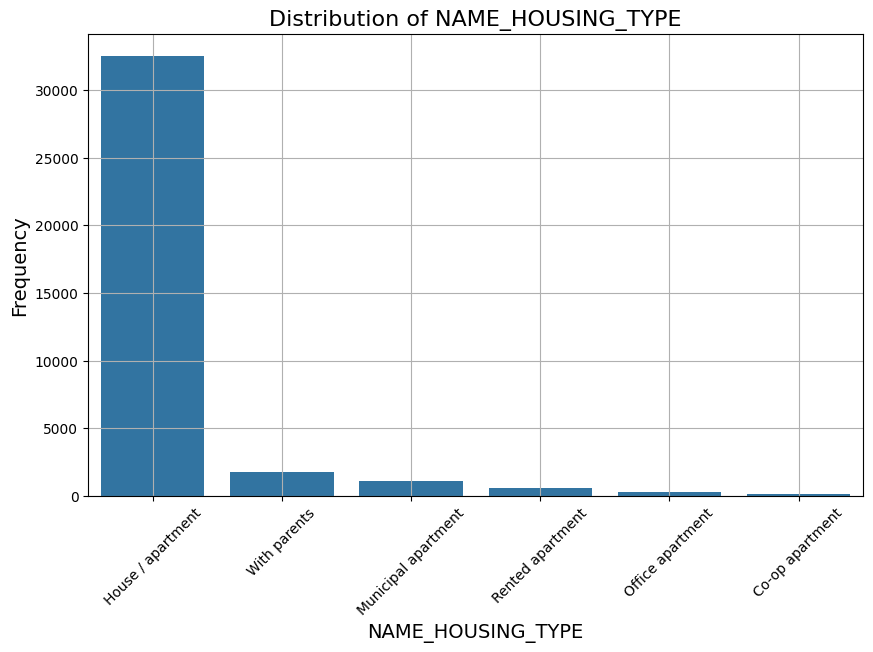

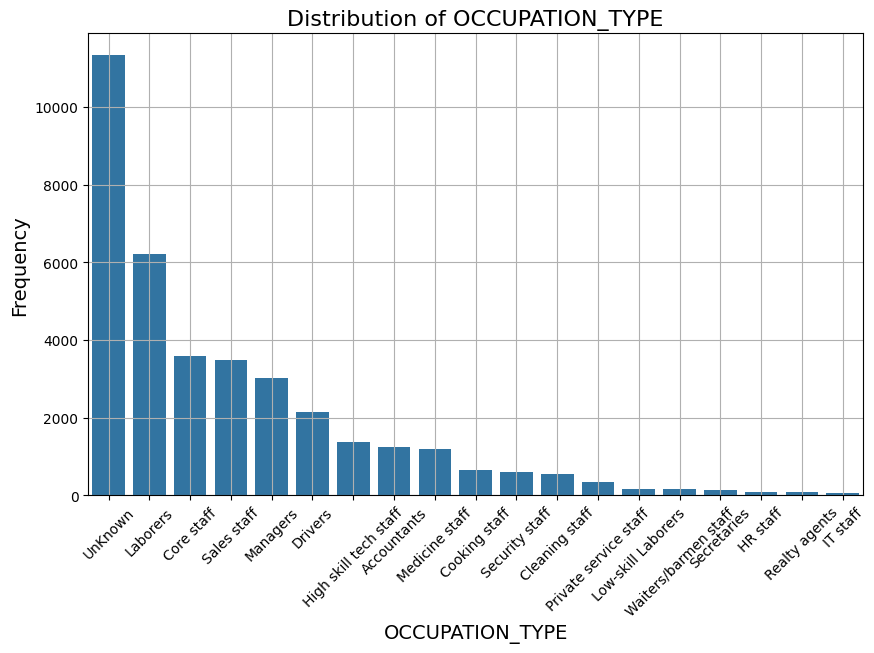

In [37]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#**TIỀN XỬ LÝ DỮ LIỆU**

##**Chuẩn hóa các đặc trưng numerical**

In [38]:
scaler = MinMaxScaler()

df[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH']] = scaler.fit_transform(df[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH']])

df.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE,IS_HIGH_RISK
0,M,Y,Y,0,0.069767,Working,Secondary / secondary special,Married,With parents,0.502802,0.033080,Core staff,2.0,-17.0,0
1,F,Y,N,1,0.069767,Commercial associate,Higher education,Single / not married,House / apartment,0.850478,0.036912,Accountants,2.0,-1.0,0
2,F,N,Y,2,0.098837,Commercial associate,Secondary / secondary special,Married,House / apartment,0.698126,0.026397,Laborers,4.0,-38.0,0
3,F,Y,Y,0,0.215116,Commercial associate,Higher education,Single / not married,House / apartment,0.239087,0.035876,Managers,1.0,-11.0,0
4,F,N,N,0,0.156977,Working,Secondary / secondary special,Separated,House / apartment,0.506426,0.039894,UnKnown,1.0,-41.0,0
5,F,Y,Y,0,0.069767,Working,Secondary / secondary special,Married,House / apartment,0.673781,0.031169,Accountants,2.0,-1.0,0
6,M,Y,Y,0,0.113372,Working,Secondary / secondary special,Married,House / apartment,0.446696,0.037002,Core staff,2.0,-16.0,0
7,F,N,N,1,0.113372,Working,Secondary / secondary special,Married,House / apartment,0.755194,0.032673,Sales staff,3.0,-21.0,0
8,F,N,N,0,0.040698,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.094774,1.000000,UnKnown,1.0,-50.0,0
9,F,Y,N,1,0.180233,Working,Higher education,Married,House / apartment,0.896903,0.036842,UnKnown,3.0,-13.0,0


##**Mã hóa One-hot cho các đặc trưng nhị phân**

In [39]:
columns_to_encode = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

one_hot_encoder = OneHotEncoder(drop=None, sparse=False)

encoded_data = one_hot_encoder.fit_transform(df[columns_to_encode])
df_encoded = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df, df_encoded], axis=1)

df = df.drop(columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE,IS_HIGH_RISK,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0,0.069767,Working,Secondary / secondary special,Married,With parents,0.502802,0.033080,Core staff,2.0,-17.0,0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,0.069767,Commercial associate,Higher education,Single / not married,House / apartment,0.850478,0.036912,Accountants,2.0,-1.0,0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,0.098837,Commercial associate,Secondary / secondary special,Married,House / apartment,0.698126,0.026397,Laborers,4.0,-38.0,0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,0.215116,Commercial associate,Higher education,Single / not married,House / apartment,0.239087,0.035876,Managers,1.0,-11.0,0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.156977,Working,Secondary / secondary special,Separated,House / apartment,0.506426,0.039894,UnKnown,1.0,-41.0,0,1.0,0.0,1.0,0.0,1.0,0.0
5,0,0.069767,Working,Secondary / secondary special,Married,House / apartment,0.673781,0.031169,Accountants,2.0,-1.0,0,1.0,0.0,0.0,1.0,0.0,1.0
6,0,0.113372,Working,Secondary / secondary special,Married,House / apartment,0.446696,0.037002,Core staff,2.0,-16.0,0,0.0,1.0,0.0,1.0,0.0,1.0
7,1,0.113372,Working,Secondary / secondary special,Married,House / apartment,0.755194,0.032673,Sales staff,3.0,-21.0,0,1.0,0.0,1.0,0.0,1.0,0.0
8,0,0.040698,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.094774,1.000000,UnKnown,1.0,-50.0,0,1.0,0.0,1.0,0.0,1.0,0.0
9,1,0.180233,Working,Higher education,Married,House / apartment,0.896903,0.036842,UnKnown,3.0,-13.0,0,1.0,0.0,0.0,1.0,1.0,0.0


##**Mã hóa nhãn cho các đặc trưng caterical**

In [40]:
label_encoder = LabelEncoder()

for column in ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']:
  df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE,IS_HIGH_RISK,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0,0.069767,4,4,1,5,0.502802,0.033080,3,2.0,-17.0,0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,0.069767,0,1,3,1,0.850478,0.036912,0,2.0,-1.0,0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,0.098837,0,4,1,1,0.698126,0.026397,8,4.0,-38.0,0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,0.215116,0,1,3,1,0.239087,0.035876,10,1.0,-11.0,0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.156977,4,4,2,1,0.506426,0.039894,17,1.0,-41.0,0,1.0,0.0,1.0,0.0,1.0,0.0
5,0,0.069767,4,4,1,1,0.673781,0.031169,0,2.0,-1.0,0,1.0,0.0,0.0,1.0,0.0,1.0
6,0,0.113372,4,4,1,1,0.446696,0.037002,3,2.0,-16.0,0,0.0,1.0,0.0,1.0,0.0,1.0
7,1,0.113372,4,4,1,1,0.755194,0.032673,14,3.0,-21.0,0,1.0,0.0,1.0,0.0,1.0,0.0
8,0,0.040698,1,4,3,2,0.094774,1.000000,17,1.0,-50.0,0,1.0,0.0,1.0,0.0,1.0,0.0
9,1,0.180233,4,1,1,1,0.896903,0.036842,17,3.0,-13.0,0,1.0,0.0,0.0,1.0,1.0,0.0


##**Chia dữ liệu huấn luyện**

In [42]:
X = df.drop("IS_HIGH_RISK", axis=1)
y = df["IS_HIGH_RISK"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29165, 17) (7292, 17) (29165,) (7292,)


#**HUẤN LUYỆN**

In [44]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

with open('random_forest_model.pkl', 'wb') as f:
  pickle.dump(random_forest_model, f)

#**ĐÁNH GIÁ**

Độ chính xác của mô hình RandomForest: 0.9832693362589139


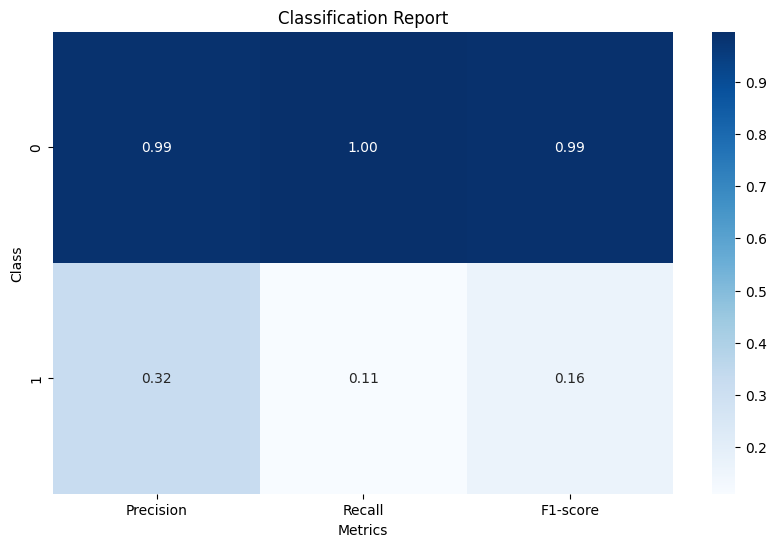

In [51]:
y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình RandomForest:", accuracy)

report = classification_report(y_test, y_pred, output_dict=True)

labels = list(report.keys())[:-3]
data = [[report[label]['precision'], report[label]['recall'], report[label]['f1-score']] for label in labels]

data_array = np.array(data)

plt.figure(figsize=(10, 6))
sns.heatmap(data_array, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=labels, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

#**TINH CHỈNH**

#**THỬ NGHIỆM**